<a href="https://colab.research.google.com/github/cipalisoc/Project2/blob/main/Project_2_(Auto_Insurance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Source of data
  - https://www.kaggle.com/code/madhushreesannigrahi/jenks-natural-breaks-and-k-means-clustering/data

2. Brief description of data
  - Shows customer insurance rating factors and statistics by customer ID

3. What is the target?
  - Can be monthly premium auto or sales channel

4. What does one row represent? (A person?  A business?  An event? A product?)
  - A client (person)

5. Is this a classification or regression problem?
  - Depending on target, monthly premium can be regression or sales channel can be classification.

6. How many features does the data have?
  - 24

7. How many rows are in the dataset?
  - 9134

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?
  - None

In [27]:
# Imports
import pandas as pd
import numpy as np
# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/Project 2/AutoInsurance.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#Clean and Explore the Data Set

# Inspect the data

In [5]:
# Display all columns
pd.set_option('display.max_column' , None)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
# Display number of rows and columns of dataframe
print(f'There are {df.shape[0]} rows and observations and {df.shape[1]} columns, and 1 target variable')

There are 9134 rows and observations and 24 columns, and 1 target variable


In [8]:
# Display column names and datatypes
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

#Clean the data

In [10]:
# Inspect column names for any errors
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

##Remove unnecessary columns

In [11]:
# Remove 'Customer' and 'Effective to Date'
df.drop(columns=['Customer','Effective To Date'] , inplace=True)

  - Removed 'Customer' and 'Effective to date' columns as we won't be dealing with time series and customer ID is not relevant to data

In [14]:
# Display any missing values
df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

##Remove unnecessary rows
  - There are no unnecessary rows

##Duplicates

In [18]:
# Display total number of duplicates
df.duplicated().sum()

163

In [23]:
# Drop duplicates
df.drop_duplicates(inplace=True)
# Check if dropped
df.duplicated().sum()

0

##Inspect column datatypes for errors

In [24]:
# Display caolumn names and datatypes
df.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

  - All columns have appropriate datatypes

##Inspect values for possible errors

In [25]:
# Display descriptive statistics for numerical columns
df.describe(include='number')

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,8004.192319,37644.828113,93.192621,15.099209,48.054175,0.385241,2.970349,433.886437
std,6867.941039,30431.741597,34.358960,10.077668,27.916442,0.909666,2.391832,291.074428
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3999.497700,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.472690
50%,5792.439588,33947.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.442328
75%,8954.637109,62365.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.988754
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [26]:
# Display descriptive statistics for object columns
df.describe(include='object')

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971
unique,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3081,7826,5469,2704,5604,4579,5656,5210,6641,3334,3685,3394,4542,6311


  - All entries seem to be normal and nothing out of the ordinary or any outliers.

#Visuals for target and all features

##Target data
  - We will assign the target data to be the 'Customer Lifetime Value' in order to build a regression model that will accurately predict Lifetime Values given specific features of a client.
  - The following is a boxplot of the distribution of current values in our target feature.

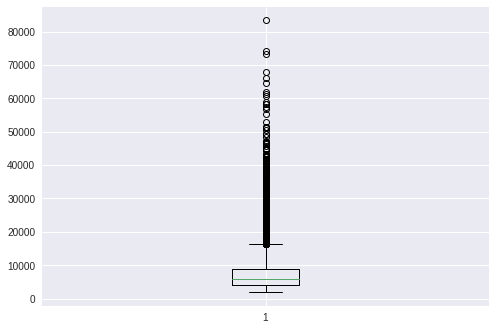

In [29]:
# Plot boxplot of target feature
plt.style.use('seaborn')
plt.boxplot(df['Customer Lifetime Value']);

## All other features
## The following are visual representations of the rest of the features in the dataset

  - Distribution of data for Income, Monthly auto premium, months since last claim, months since policy inception, and total claim amount features

Text(0.5, 1.0, 'Total Claim Amount')

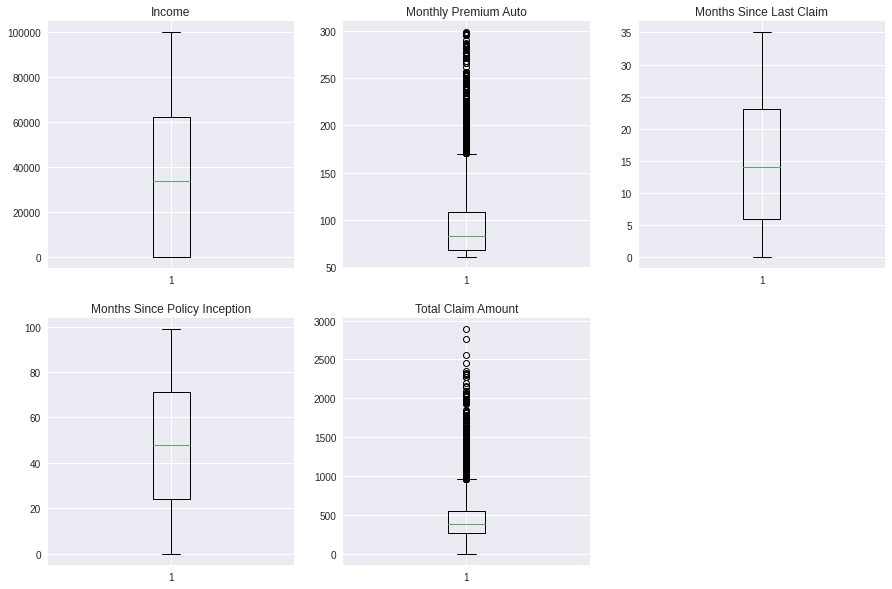

In [37]:
# Display boxplot showing distribution of some numerical features
plt.style.use('seaborn')
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.boxplot(df['Income']);
plt.title('Income')

plt.subplot(2, 3, 2)
plt.boxplot(df['Monthly Premium Auto']);
plt.title('Monthly Premium Auto')

plt.subplot(2, 3, 3)
plt.boxplot(df['Months Since Last Claim']);
plt.title('Months Since Last Claim')

plt.subplot(2, 3, 4)
plt.boxplot(df['Months Since Policy Inception']);
plt.title('Months Since Policy Inception')

plt.subplot(2, 3, 5)
plt.boxplot(df['Total Claim Amount']);
plt.title('Total Claim Amount')

  - Barplots showing the counts of values in the categorical features:

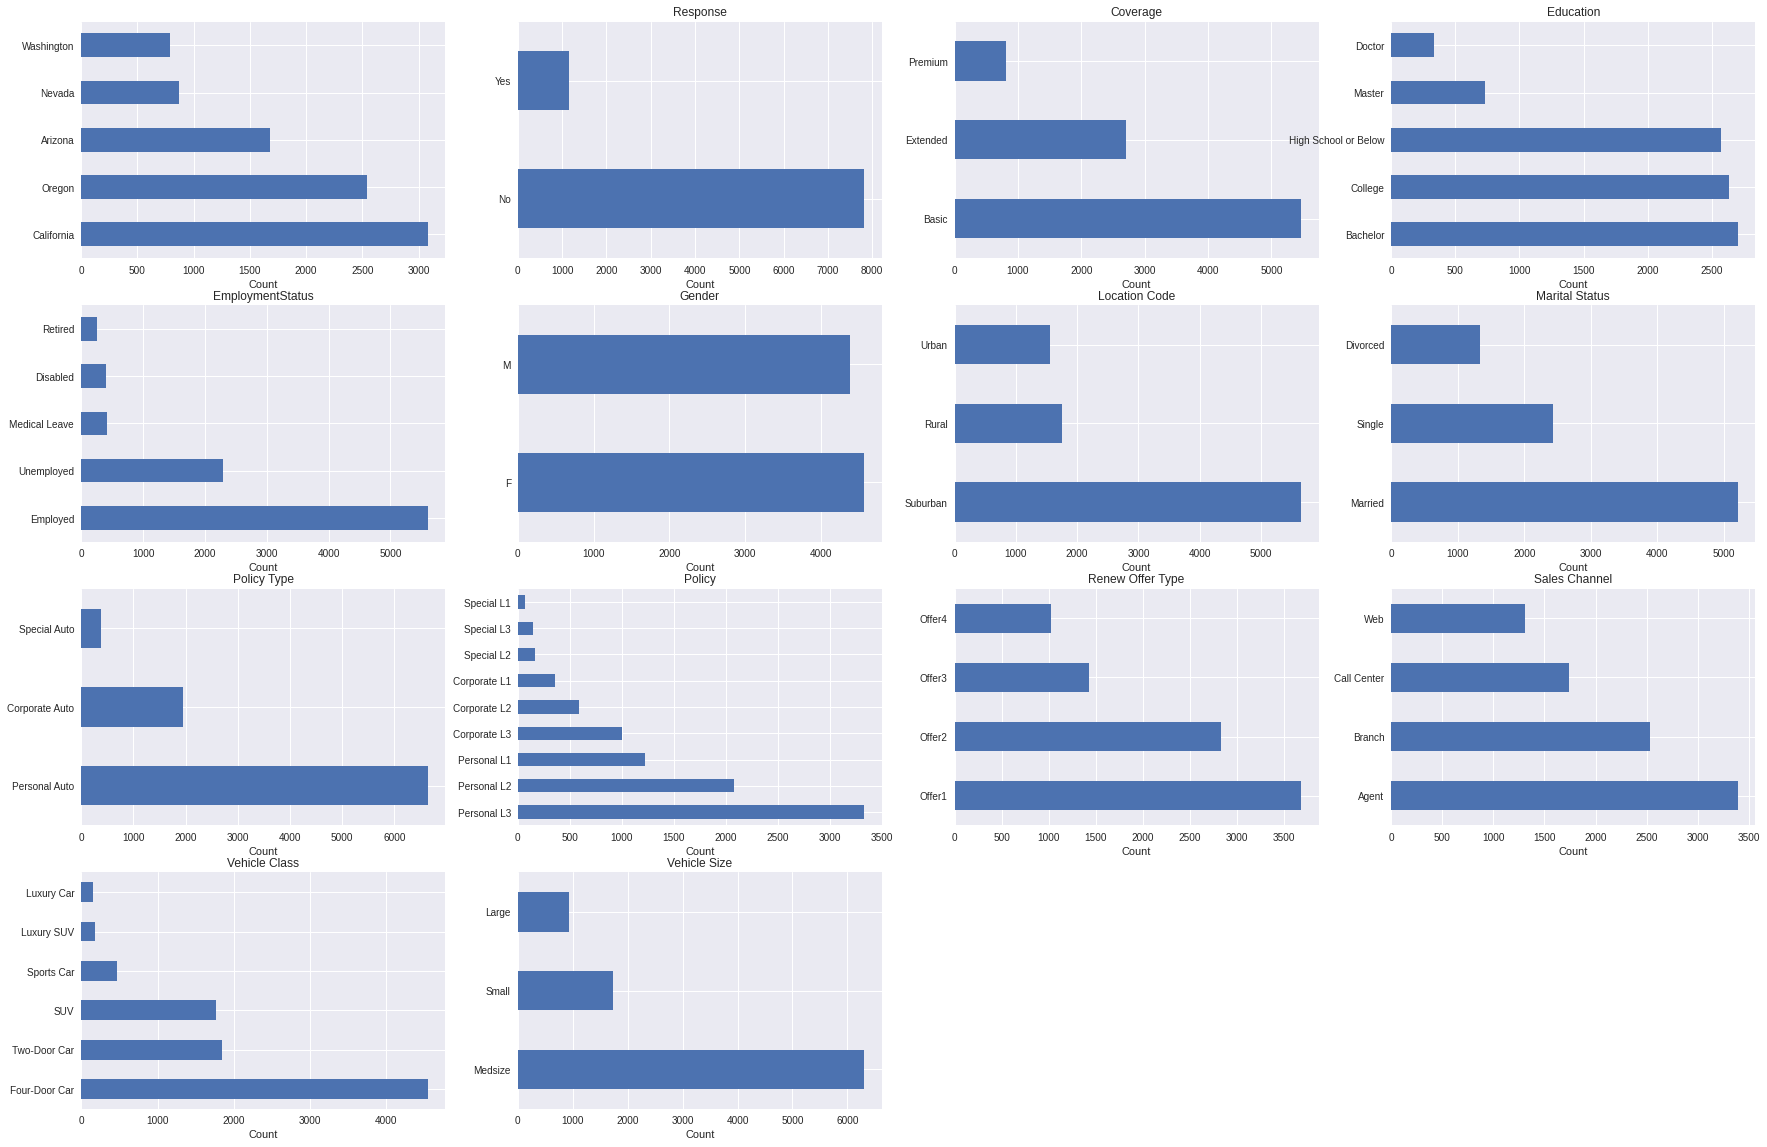

In [73]:
# Display barplot showing value counts for categorical features
plt.style.use('seaborn')
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
count1 = df['State'].value_counts()
plt.xlabel('Count')
count1.plot.barh();

plt.subplot(4,4,2)
count2 = df['Response'].value_counts()
plt.xlabel('Count')
plt.title('Response')
count2.plot.barh();

plt.subplot(4,4,3)
count3 = df['Coverage'].value_counts()
plt.xlabel('Count')
plt.title('Coverage')
count3.plot.barh();

plt.subplot(4,4,4)
count4 = df['Education'].value_counts()
plt.xlabel('Count')
plt.title('Education')
count4.plot.barh();

plt.subplot(4,4,5)
count5 = df['EmploymentStatus'].value_counts()
plt.xlabel('Count')
plt.title('EmploymentStatus')
count5.plot.barh();

plt.subplot(4,4,6)
count6 = df['Gender'].value_counts()
plt.xlabel('Count')
plt.title('Gender')
count6.plot.barh();

plt.subplot(4,4,7)
count7 = df['Location Code'].value_counts()
plt.xlabel('Count')
plt.title('Location Code')
count7.plot.barh();

plt.subplot(4,4,8)
count8 = df['Marital Status'].value_counts()
plt.xlabel('Count')
plt.title('Marital Status')
count8.plot.barh();

plt.subplot(4,4,9)
count9 = df['Policy Type'].value_counts()
plt.xlabel('Count')
plt.title('Policy Type')
count9.plot.barh();

plt.subplot(4,4,10)
count10 = df['Policy'].value_counts()
plt.xlabel('Count')
plt.title('Policy')
count10.plot.barh();

plt.subplot(4,4,11)
count11 = df['Renew Offer Type'].value_counts()
plt.xlabel('Count')
plt.title('Renew Offer Type')
count11.plot.barh();

plt.subplot(4,4,12)
count12 = df['Sales Channel'].value_counts()
plt.xlabel('Count')
plt.title('Sales Channel')
count12.plot.barh();

plt.subplot(4,4,13)
count13 = df['Vehicle Class'].value_counts()
plt.xlabel('Count')
plt.title('Vehicle Class')
count13.plot.barh();

plt.subplot(4,4,14)
count14 = df['Vehicle Size'].value_counts()
plt.xlabel('Count')
plt.title('Vehicle Size')
count14.plot.barh();